In [146]:
import numpy as np
import graphviz
import itertools
from matplotlib import pyplot as plt
import matplotlib as mpl

In [162]:
#           1 .   2 .       3 .          4 .       5 .          6           7           8           
tasks = ["RGB", "Normal", "Curvature", "Depth", "Reshading", "2D Edges", "3D Edges", "2D Keypoints"]
# .          9                    10                    11              12
tasks += ["3D Keypoints", "Sem. Segmentation", "Object Class", "Scene Class"]
affinity = np.array([
 #  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [1, 9, 10, 12, 11, 2, 7, 3, 6, 8, 4, 5],     # 1
    [12, 1, 2, 7, 6, 8, 3, 9, 4, 5, 10, 11],     # 2
    [12, 7, 1, 6, 8, 2, 3, 4, 5, 9, 10, 11],     # 3
    [12, 2, 3, 1, 4, 6, 5, 8, 7, 9, 10, 11],     # 4
    [12, 2, 5, 3, 1, 4, 6, 7, 8, 9, 10, 11],     # 5
    [12, 6, 2, 8, 7, 1, 5, 4, 3, 9, 10, 11],     # 6
    [12, 6, 5, 8, 7, 4, 1, 3, 2, 9, 10, 11],     # 7
    [12, 4, 6, 5, 8, 2, 3, 1, 7, 9, 10, 11],     # 8
    [12, 3, 2, 7, 8, 5, 6, 4, 1, 9, 10, 11],     # 9
    [12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 2, 3],     # 10
    [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 2],     # 11
    [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 2, 1],     # 12
  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
])

valid = np.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
])

affinity_normalized = affinity/12.0
affinity_normalized = (affinity-affinity.min(axis=0, keepdims=True))/(affinity.max(axis=0, keepdims=True)-affinity.min(axis=0, keepdims=True))
affinity_normalized = (affinity_normalized*99 + 1).astype(int)

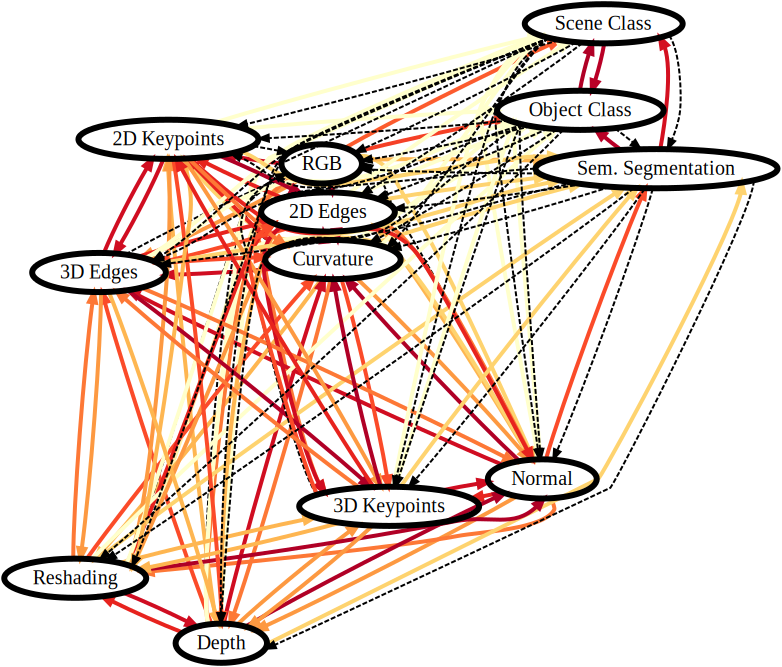

In [164]:
from graphviz import Digraph

dot = Digraph()
dot.attr(layout="neato")
dot.attr(splines="true")
dot.attr(overlap="compress")
dot.attr(outputMode="edgesfirst")
dot.attr(outputorder="edgesfirst")

for task in tasks:
    dot.node(task, task, penwidth="6", fontsize="20")

cmap = plt.get_cmap("YlOrRd")
for i, j in itertools.product(range(len(tasks)), range(len(tasks))):
    if not valid[i, j]:
        if i == j: continue
        dot.edge(tasks[i], tasks[j], penwidth="2", style="dashed",
             color="#000000")
    else:
        dot.edge(tasks[i], tasks[j], penwidth="4", 
                 color=matplotlib.colors.to_hex(cmap(1.0 - affinity_normalized[i, j]/100.0)), len=str(affinity_normalized[i, j]//6))

dot.attr(outputorder="edgesfirst")
dot.attr(outputMode="edgesfirst")

dot.format = "png"
dot.render("visuals/graph")
dot

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

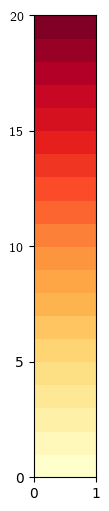

In [246]:
matplotlib.rcParams.update({'font.size': 22})


def plot_cmap(cmap, ncolor):
    """ 
    A convenient function to plot colors of a matplotlib cmap
 
    Args:
        ncolor (int): number of color to show
        cmap: a cmap object or a matplotlib color name
    """
 
    if isinstance(cmap, str):
        try:
            cm = plt.get_cmap(cmap)
        except ValueError:
            print("WARNINGS :", cmap, " is not a known colormap")
            cm = plt.cm.gray
    else:
        cm = cmap
 
    with mpl.rc_context(mpl.rcParamsDefault):
        fig = plt.figure(figsize=(0.8, 6), frameon=False)
        ax = fig.add_subplot(111)
        ax.pcolor(np.linspace(1, ncolor, ncolor).reshape(ncolor, 1), cmap=cm)
        
        plt.set_title("Transfer Win Rate (AHP Normalized)", labelpad=20)
        plt.yticks([0, 4, 8, 12, 16, 20], labels=["0%", "20%", "40%", "60%", "80%", "100%"])
        xt = ax.set_xticks([])
    return fig

plot_cmap(plt.get_cmap("YlOrRd"), 20)
plt.show()

(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)
(436, 1024, 3) (436, 1024, 3) (436, 1024, 3)


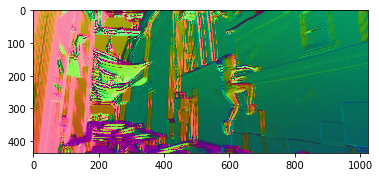

In [9]:
from scripts.normals_estimate import normal_from_depth
_, img = normal_from_depth("data/frame_0031.png")
plt.imshow(img)

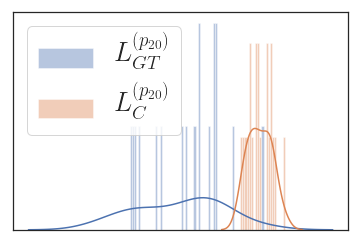

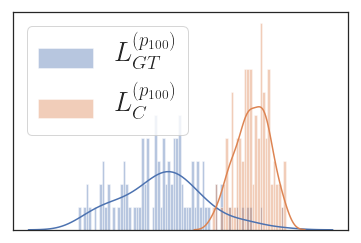

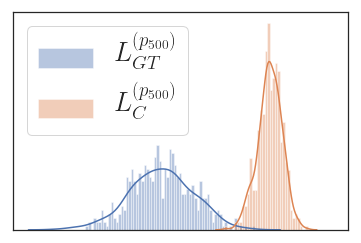

In [225]:
import seaborn as sns
import random
sns.set(font_scale=2.5)
plt.rc('text', usetex=True)


def plot_gaussians(x, x_std, y, y_std, samples):
    x = [random.gauss(x, x_std) for _ in range(samples)]
    y = [random.gauss(y, y_std) for _ in range(samples)]

    bins = np.linspace(-8, 8, 100)

    with sns.axes_style("white"):
        sns.distplot(x, bins, label='$L_{GT}^{(p_{' + str(samples) + '})}$')
        sns.distplot(y, bins, label='$L_{C}^{(p_{' + str(samples) + '})}$')
        plt.legend()
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticklabels([])
        cur_axes.axes.get_yaxis().set_ticklabels([])
        plt.show()

plot_gaussians(-2, 3, 3, 1, 20)
plot_gaussians(-2.5, 2.6, 3.2, 1, 100)
plot_gaussians(-3, 2, 4, 0.8, 500)